# Программирование и компьютерные науки

## Семинар 10: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
2. Работаем с градиентами руками
3. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Сравниваем операции **NumPy** и его функциональность с **PyTorch**


Операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [7]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.9235, 0.7387, 0.7824],
        [0.5314, 0.7678, 0.2330],
        [0.6872, 0.5607, 0.2554],
        [0.4921, 0.7567, 0.8675],
        [0.9912, 0.7422, 0.0609]])

In [8]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [9]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [10]:
# сложение
x + 5

tensor([[5.9235, 5.7387, 5.7824],
        [5.5314, 5.7678, 5.2330],
        [5.6872, 5.5607, 5.2554],
        [5.4921, 5.7567, 5.8675],
        [5.9912, 5.7422, 5.0609]])

In [14]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[2.0107, 1.2402, 1.2487, 1.6921, 1.5113],
        [1.2402, 0.9261, 0.8552, 1.0446, 1.1107],
        [1.2487, 0.8552, 0.8519, 0.9841, 1.1129],
        [1.6921, 1.0446, 0.9841, 1.5672, 1.1022],
        [1.5113, 1.1107, 1.1129, 1.1022, 1.5370]])

In [15]:
x @ x.transpose(1, 0)

tensor([[2.0107, 1.2402, 1.2487, 1.6921, 1.5113],
        [1.2402, 0.9261, 0.8552, 1.0446, 1.1107],
        [1.2487, 0.8552, 0.8519, 0.9841, 1.1129],
        [1.6921, 1.0446, 0.9841, 1.5672, 1.1022],
        [1.5113, 1.1107, 1.1129, 1.1022, 1.5370]])

In [13]:
# очередное матричное умножение
x.mm(x.t())

tensor([[2.0107, 1.2402, 1.2487, 1.6921, 1.5113],
        [1.2402, 0.9261, 0.8552, 1.0446, 1.1107],
        [1.2487, 0.8552, 0.8519, 0.9841, 1.1129],
        [1.6921, 1.0446, 0.9841, 1.5672, 1.1022],
        [1.5113, 1.1107, 1.1129, 1.1022, 1.5370]])

In [16]:
x.mm(x.T)

tensor([[2.0107, 1.2402, 1.2487, 1.6921, 1.5113],
        [1.2402, 0.9261, 0.8552, 1.0446, 1.1107],
        [1.2487, 0.8552, 0.8519, 0.9841, 1.1129],
        [1.6921, 1.0446, 0.9841, 1.5672, 1.1022],
        [1.5113, 1.1107, 1.1129, 1.1022, 1.5370]])

In [17]:
# поэлементное умножение
x * x

tensor([[0.8529, 0.5456, 0.6121],
        [0.2823, 0.5895, 0.0543],
        [0.4723, 0.3144, 0.0652],
        [0.2422, 0.5726, 0.7525],
        [0.9825, 0.5508, 0.0037]])

In [28]:
x = torch.rand(5, 3)

In [29]:
x.shape

torch.Size([5, 3])

In [31]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.5841, 0.5336, 0.4817, 0.3855, 0.4862])

In [33]:
# решейп
x.view([3, 5])

tensor([[0.9846, 0.2523, 0.5154, 0.3934, 0.2210],
        [0.9863, 0.3469, 0.5598, 0.5382, 0.7920],
        [0.3090, 0.0555, 0.9226, 0.0135, 0.5226]])

In [35]:
# или так
x.reshape([3, 5])

tensor([[0.9846, 0.2523, 0.5154, 0.3934, 0.2210],
        [0.9863, 0.3469, 0.5598, 0.5382, 0.7920],
        [0.3090, 0.0555, 0.9226, 0.0135, 0.5226]])

In [37]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.T) == x.T

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [39]:
torch.sum(torch.arange(1, 1e4 + 1) ** 2).item()

333383303168.0

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [40]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [41]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.8877, 0.5096, 0.8745],
        [0.8034, 0.2596, 0.3186],
        [0.2935, 0.4546, 0.7164],
        [0.4047, 0.4752, 0.2016],
        [0.6504, 0.8169, 0.8564]])

In [42]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [43]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [44]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [45]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-1.4468, -0.8456,  1.0427],
        [ 1.1962,  1.5371, -0.6578],
        [-1.6700,  1.0590, -0.1238],
        [-0.6042, -1.3988, -0.2357],
        [-0.2054,  1.1883, -0.3993]])

In [46]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [47]:
x

tensor([[0.5261, 0.0697, 0.6298],
        [0.0118, 0.2179, 0.7749],
        [0.8194, 0.8340, 0.7919],
        [0.3695, 0.9149, 0.5372],
        [0.3179, 0.7795, 0.9990]])

In [48]:
y

tensor([[0.0915, 0.7820, 0.0804],
        [0.8742, 0.8225, 0.1313],
        [0.0793, 0.1619, 0.8430],
        [0.6858, 0.1154, 0.6344],
        [0.9218, 0.2469, 0.4598]])

In [49]:
# сложение
x + y

tensor([[0.6175, 0.8518, 0.7102],
        [0.8860, 1.0404, 0.9063],
        [0.8986, 0.9960, 1.6350],
        [1.0553, 1.0302, 1.1716],
        [1.2396, 1.0264, 1.4588]])

In [50]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.6175, 0.8518, 0.7102],
        [0.8860, 1.0404, 0.9063],
        [0.8986, 0.9960, 1.6350],
        [1.0553, 1.0302, 1.1716],
        [1.2396, 1.0264, 1.4588]])

In [51]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.6175, 0.8518, 0.7102],
        [0.8860, 1.0404, 0.9063],
        [0.8986, 0.9960, 1.6350],
        [1.0553, 1.0302, 1.1716],
        [1.2396, 1.0264, 1.4588]])

In [58]:
x.shape

torch.Size([5, 3])

In [59]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [60]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).shape

torch.Size([1, 5, 3])

In [61]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [62]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [63]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [64]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [65]:
x, a

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [66]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [67]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [68]:
!wget -O 'data.csv' -q https://www.dropbox.com/s/gn4j34zvjdgy3zh/boston.csv

In [69]:
data = pd.read_csv('data.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


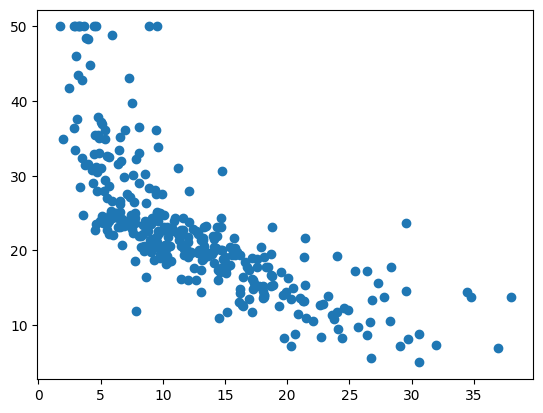

In [70]:
plt.scatter(data.values[:, -2], data.values[:, -1])

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [71]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data.values[:, -2] / data.values[:, -2].max(), dtype=torch.float32)
y = torch.tensor(data.values[:, -1], dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [72]:
x.size(), y.size()

(torch.Size([333]), torch.Size([333]))

In [77]:
x.unsqueeze_(0)

tensor([[[0.1312, 0.2407, 0.0774, 0.1404, 0.3274, 0.5386, 0.3495, 0.4137,
          0.2175, 0.2702, 0.2231, 0.1733, 0.3079, 0.5536, 0.3642, 0.4930,
          0.5236, 0.4551, 0.5952, 0.3434, 0.5357, 0.2668, 0.1138, 0.0521,
          0.1530, 0.1959, 0.2515, 0.2689, 0.3727, 0.4951, 0.4267, 0.3542,
          0.2484, 0.2220, 0.3898, 0.1267, 0.1520, 0.1040, 0.1807, 0.3463,
          0.3803, 0.2502, 0.2120, 0.1230, 0.2697, 0.2133, 0.3447, 0.1770,
          0.1454, 0.1986, 0.1786, 0.2354, 0.3152, 0.2705, 0.1393, 0.1902,
          0.1978, 0.2534, 0.1720, 0.3387, 0.2223, 0.1449, 0.1501, 0.2320,
          0.1636, 0.2789, 0.2987, 0.2481, 0.2020, 0.2800, 0.3540, 0.4914,
          0.3711, 0.3231, 0.4095, 0.2676, 0.2752, 0.3171, 0.2713, 0.4048,
          0.3584, 0.3785, 0.3758, 0.4722, 0.6692, 0.4630, 0.7179, 0.4527,
          0.4053, 0.3229, 0.3958, 0.4559, 0.4451, 0.3843, 0.5615, 0.4862,
          0.9062, 0.7063, 0.7322, 0.7777, 0.7459, 0.5649, 0.3713, 0.4159,
          0.3982, 0.4251, 0.1693, 0.19

In [80]:
x.squeeze_(0)

tensor([[0.1312, 0.2407, 0.0774, 0.1404, 0.3274, 0.5386, 0.3495, 0.4137, 0.2175,
         0.2702, 0.2231, 0.1733, 0.3079, 0.5536, 0.3642, 0.4930, 0.5236, 0.4551,
         0.5952, 0.3434, 0.5357, 0.2668, 0.1138, 0.0521, 0.1530, 0.1959, 0.2515,
         0.2689, 0.3727, 0.4951, 0.4267, 0.3542, 0.2484, 0.2220, 0.3898, 0.1267,
         0.1520, 0.1040, 0.1807, 0.3463, 0.3803, 0.2502, 0.2120, 0.1230, 0.2697,
         0.2133, 0.3447, 0.1770, 0.1454, 0.1986, 0.1786, 0.2354, 0.3152, 0.2705,
         0.1393, 0.1902, 0.1978, 0.2534, 0.1720, 0.3387, 0.2223, 0.1449, 0.1501,
         0.2320, 0.1636, 0.2789, 0.2987, 0.2481, 0.2020, 0.2800, 0.3540, 0.4914,
         0.3711, 0.3231, 0.4095, 0.2676, 0.2752, 0.3171, 0.2713, 0.4048, 0.3584,
         0.3785, 0.3758, 0.4722, 0.6692, 0.4630, 0.7179, 0.4527, 0.4053, 0.3229,
         0.3958, 0.4559, 0.4451, 0.3843, 0.5615, 0.4862, 0.9062, 0.7063, 0.7322,
         0.7777, 0.7459, 0.5649, 0.3713, 0.4159, 0.3982, 0.4251, 0.1693, 0.1946,
         0.1449, 0.0456, 0.0

In [81]:
y_pred = w @ x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [82]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.6142])
dL/db = tensor([-43.0579])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [83]:
w.data, w.grad

(tensor([0.9184]), tensor([-11.6142]))

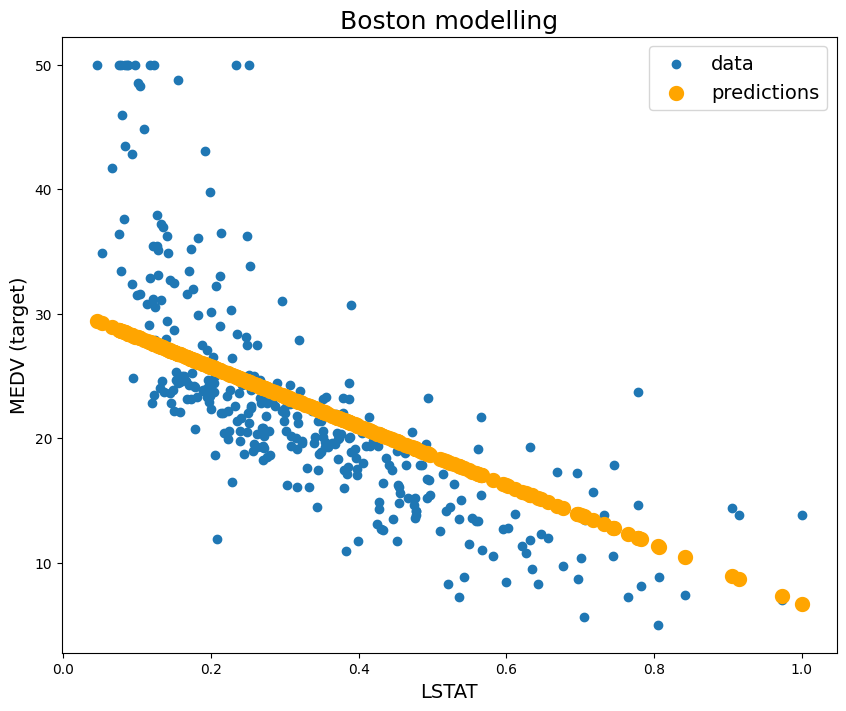

loss =  43.639275


In [84]:
from IPython.display import clear_output

for i in range(400):
    y_pred = w @ x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 10 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

In [92]:
import json
from sklearn.model_selection import train_test_split
import bz2
import regex
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [93]:
from tqdm import tqdm

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/user04/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
!wget -O banki_responses.json.bz2 -q https://www.dropbox.com/s/7v3s14tu0cy7cnv/banki_responses.json.bz2

In [94]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked']:
            responses.append(resp)

In [95]:
responses = list(filter(lambda r: r['rating_grade'] is not None, responses))
texts = list(map(lambda r: regex.sub(r'[^\p{Cyrillic}]', ' ', r['text'].lower()), responses))
ratings = list(map(lambda r: r['rating_grade'], responses))

In [96]:
lemmatizer = WordNetLemmatizer()

In [98]:
lem_texts = []
for text in tqdm(texts[:10000]):
  lem_texts.append(' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:08<00:00, 1216.27it/s]


In [99]:
%%time
vectorizer = TfidfVectorizer(encoding='utf8', min_df=10)
_ = vectorizer.fit(lem_texts[:10000])

CPU times: user 1.87 s, sys: 101 ms, total: 1.98 s
Wall time: 2.12 s


In [139]:
X = vectorizer.transform(lem_texts[:10000])
Y = (np.array(ratings[:10000]) > 3).astype(int)

In [140]:
X, Y

(<10000x13034 sparse matrix of type '<class 'numpy.float64'>'
 	with 1339627 stored elements in Compressed Sparse Row format>,
 array([0, 0, 0, ..., 0, 0, 0]))

In [141]:
X = X.tocoo()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, shuffle=True)

In [145]:
X_train

<3000x13034 sparse matrix of type '<class 'numpy.float64'>'
	with 396371 stored elements in Compressed Sparse Row format>

In [146]:
X_test

<7000x13034 sparse matrix of type '<class 'numpy.float64'>'
	with 943256 stored elements in Compressed Sparse Row format>

In [147]:
X

<10000x13034 sparse matrix of type '<class 'numpy.float64'>'
	with 1339627 stored elements in COOrdinate format>

In [143]:
def sp2tensor(X):
    values = X.data
    indices = np.vstack((X.row, X.col))

    i = torch.LongTensor(indices)
    v = torch.FloatTensor(values)
    shape = X.shape

    X_t = torch.sparse.FloatTensor(i, v, torch.Size(shape))
    return X_t

In [148]:
X_train_t, X_test_t = sp2tensor(X_train.tocoo()), sp2tensor(X_test.tocoo())

In [149]:
y_train_t = torch.Tensor(y_train)
y_test_t = torch.Tensor(y_test)

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

In [105]:
import torch.nn as nn

In [106]:
class firstNN(nn.Module):

  def __init__(self, input_size):
    super(firstNN, self).__init__()
    self.fc1 = nn.Linear(input_size, 4096)
    self.act1 = F.relu
    self.fc2 = nn.Linear(4096, 1024)
    self.act2 = F.relu
    self.fc3 = nn.Linear(1024, 1)
    self.act3 = F.sigmoid

  def forward(self, x):
    out = self.fc1(x)
    out = self.act1(out)
    out = self.fc2(out)
    out = self.act2(out)
    out = self.fc3(out)
    out = self.act3(out)
    return out

In [150]:
model = firstNN(X_train_t.shape[1])

Веса моделей хранятся в виде матриц и выглядят так:

In [151]:
[x for x in model.named_parameters()]

[('fc1.weight',
  Parameter containing:
  tensor([[-3.1643e-03, -3.8090e-04,  5.4374e-03,  ...,  3.1428e-03,
            1.4538e-04, -6.8712e-03],
          [ 5.5093e-03, -3.7940e-03,  3.4993e-03,  ..., -8.7405e-03,
           -4.0105e-03, -6.6882e-03],
          [-3.3625e-03, -5.4535e-03,  7.0653e-04,  ..., -4.1296e-04,
           -7.3656e-03, -5.4850e-03],
          ...,
          [ 4.5431e-03, -2.9577e-03,  2.7373e-03,  ...,  5.2723e-03,
           -7.9262e-03,  8.6451e-05],
          [ 3.1451e-04, -3.6788e-03,  2.9794e-03,  ...,  8.0334e-03,
           -4.0942e-03, -7.0037e-03],
          [ 1.5854e-03,  5.7048e-03,  7.9484e-03,  ..., -5.9694e-03,
            6.4056e-03,  3.0738e-03]], requires_grad=True)),
 ('fc1.bias',
  Parameter containing:
  tensor([ 0.0066, -0.0024,  0.0014,  ...,  0.0049,  0.0072,  0.0034],
         requires_grad=True)),
 ('fc2.weight',
  Parameter containing:
  tensor([[-0.0152, -0.0041,  0.0005,  ..., -0.0002,  0.0114,  0.0026],
          [-0.0051,  0.0041,

In [152]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [153]:
device

'cpu'

In [154]:
model = model.to(device)
X_train_t = X_train_t.to(device)
y_train_t = y_train_t.to(device)
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)

In [155]:
batch_size = 256

In [156]:
def train(model, X, y, optimizer, epochs, batch_size):
  losses = []
  for epoch in tqdm(range(epochs)):
    y_pred = model(X)  # делаем предсказания
    loss = F.binary_cross_entropy(y_pred, y)  # считаем лосс
    losses.append(loss)
    loss.backward()  # считаем градиенты обратным проходом
    optimizer.step()  # обновляем параметры сети
    optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров
    #if (epoch + 1) % 10 == 0:
    labels = (model.forward(X) > 0.5).int()
    acc = torch.mean((labels == y).float()).item()
    print(f"Accuracy: {acc:.2f}")
    print(f"Loss: {loss:.2f}")
  return losses

In [157]:
epochs = 20
model = firstNN(X_train_t.shape[1]).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)

In [159]:
history = train(model, X_train_t, y_train_t.unsqueeze(1), optimizer, epochs, batch_size)

  5%|▌         | 1/20 [00:38<12:08, 38.34s/it]

Accuracy: 0.83
Loss: 0.69


 10%|█         | 2/20 [01:17<11:37, 38.74s/it]

Accuracy: 0.83
Loss: 0.69


 15%|█▌        | 3/20 [01:57<11:06, 39.21s/it]

Accuracy: 0.83
Loss: 0.69


 20%|██        | 4/20 [02:37<10:36, 39.76s/it]

Accuracy: 0.83
Loss: 0.69


 25%|██▌       | 5/20 [03:22<10:24, 41.61s/it]

Accuracy: 0.83
Loss: 0.68


 30%|███       | 6/20 [04:07<09:58, 42.72s/it]

Accuracy: 0.83
Loss: 0.68


 35%|███▌      | 7/20 [04:49<09:10, 42.36s/it]

Accuracy: 0.83
Loss: 0.68


 40%|████      | 8/20 [05:30<08:23, 41.95s/it]

Accuracy: 0.83
Loss: 0.68


 45%|████▌     | 9/20 [06:13<07:47, 42.50s/it]

Accuracy: 0.83
Loss: 0.68


 50%|█████     | 10/20 [06:56<07:06, 42.65s/it]

Accuracy: 0.83
Loss: 0.68


 55%|█████▌    | 11/20 [07:37<06:18, 42.08s/it]

Accuracy: 0.83
Loss: 0.68


 60%|██████    | 12/20 [08:16<05:28, 41.04s/it]

Accuracy: 0.83
Loss: 0.67


 65%|██████▌   | 13/20 [08:53<04:39, 39.99s/it]

Accuracy: 0.83
Loss: 0.67


 70%|███████   | 14/20 [09:33<03:58, 39.77s/it]

Accuracy: 0.83
Loss: 0.67


 75%|███████▌  | 15/20 [10:09<03:13, 38.79s/it]

Accuracy: 0.83
Loss: 0.67


 80%|████████  | 16/20 [10:46<02:32, 38.09s/it]

Accuracy: 0.83
Loss: 0.67


 85%|████████▌ | 17/20 [11:22<01:52, 37.56s/it]

Accuracy: 0.83
Loss: 0.67


 90%|█████████ | 18/20 [11:59<01:14, 37.28s/it]

Accuracy: 0.83
Loss: 0.67


 95%|█████████▌| 19/20 [12:36<00:37, 37.26s/it]

Accuracy: 0.83
Loss: 0.67


 95%|█████████▌| 19/20 [12:54<00:40, 40.75s/it]


KeyboardInterrupt: 

In [ ]:
history

In [ ]:
plt.plot(history.cpu().numpy())

### Дополнительные материалы:

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)